In [1]:
%load_ext autoreload
%aimport utils
%autoreload 1

In [4]:
from math import sqrt, factorial, pi, exp, sin, cos, ceil, log
import numpy as np
from scipy.special import erf, erfinv
from src.inverse_cdf import InverseCDF

In [4]:
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle, Arc
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
%matplotlib inline


legend_opts = {
    'fontsize':15,
    'frameon':True, 
    'framealpha':1,
    'facecolor':'white',
    'edgecolor':'black',
    'labelspacing':0.1}

Plot for outline of PPT

In [5]:
rng = np.random.RandomState(42)
xs = rng.standard_normal(size=500)
ys = rng.standard_normal(size=500)
L = np.array([[-1.85882053, -0.73809637],
       [-1.45132321,  0.94533641]])
L2 = np.linalg.cholesky(np.array([[1, -2], [-2, 8]]))
transformed_xs, transformed_ys = np.array([7, 9])[:, np.newaxis] + L @ np.array([xs, ys])
transformed_xs2, transformed_ys2 = np.array([-10, -3])[:, np.newaxis] + L2 @ np.array([xs, ys])

FileNotFoundError: [Errno 2] No such file or directory: 'viz/intro.png'

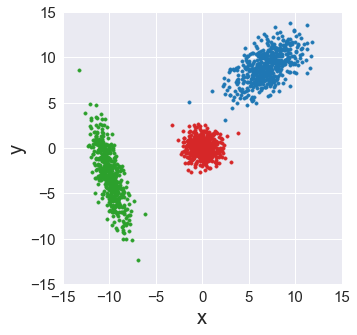

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(xs, ys, marker='.', color='tab:red')
ax.scatter(transformed_xs, transformed_ys, marker='.', color='tab:blue')
ax.scatter(transformed_xs2, transformed_ys2, marker='.', color='tab:green')

ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.savefig('viz/intro.png')

# Inversion sampling

## Relationship between CDF and PDF of a distribution

In [9]:
def cdf(z):
    return 0.5 + 0.5*erf(z/sqrt(2))

In [10]:
def pdf(z):
    return 1/np.sqrt(2*pi) * np.exp(-z**2/2)

In [11]:
def invcdf(A):
    return sqrt(2) * erfinv(2*A-1)

In [12]:
rng = np.random.RandomState(42)
samples = rng.standard_normal(size=200)

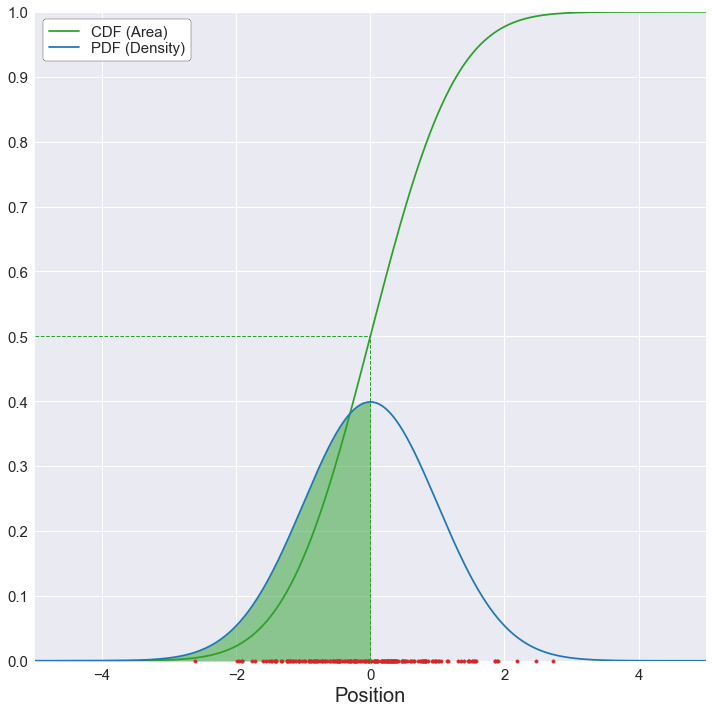

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
z = np.arange(-5, 5.01, 0.01)
z_minus = z[z<0]
ax.plot(z, cdf(z), label=r'CDF (Area)', color='tab:green')
ax.plot(z, pdf(z), label=r'PDF (Density)', color='tab:blue')
ax.vlines(0, 0, 0.5, linestyles='--', lw=1, color='tab:green')
ax.hlines(0.5, -5, 0, linestyles='--', lw=1, color='tab:green')
ax.fill_between(z_minus, 0, pdf(z_minus), color='tab:green', alpha=0.5)
ax.scatter(samples, np.zeros(len(samples)), marker='.', color='tab:red', clip_on=False)
ax.set_xlabel('Position')
ax.legend(**legend_opts, loc='upper left')
ax.set_xlim(-5, 5)
ax.set_ylim(-0, 1)
ax.set_yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.show()
fig.savefig('viz/cdf_pdf.png')

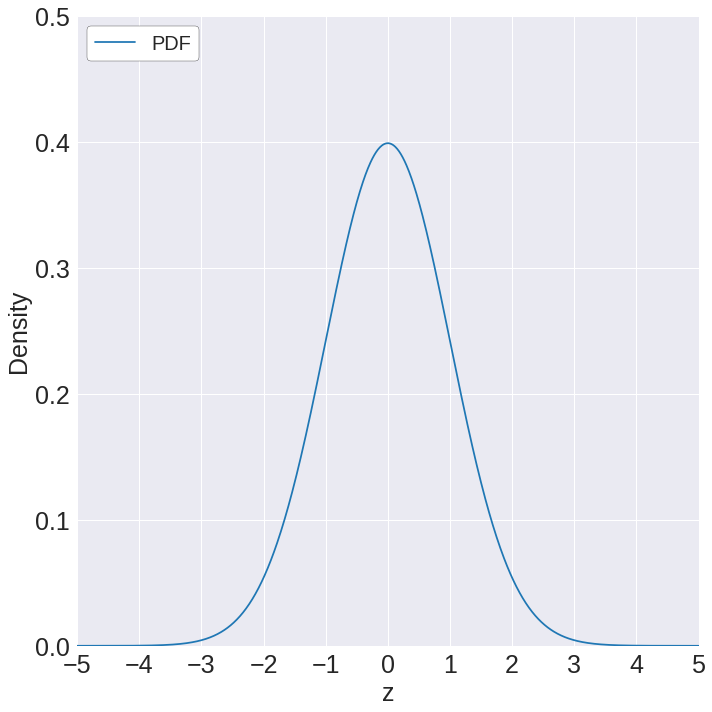

In [122]:
fig, ax = plt.subplots(figsize=(10, 10))
z = np.arange(-5, 5.01, 0.01)
a, b = -2, 1
z_ab = z[(z>=a) & (z<=b)]
ax.plot(z, pdf(z), label=r'PDF', color='tab:blue')
ax.legend(**legend_opts, loc='upper left')
ax.set_xlim(-5, 5)
ax.set_ylim(-0, 0.5)
ax.set_yticks(np.arange(0, 0.51, 0.1))
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_xlabel('z')
ax.set_ylabel('Density')

plt.tight_layout()

plt.show()
fig.savefig('viz/normalpdf.png')

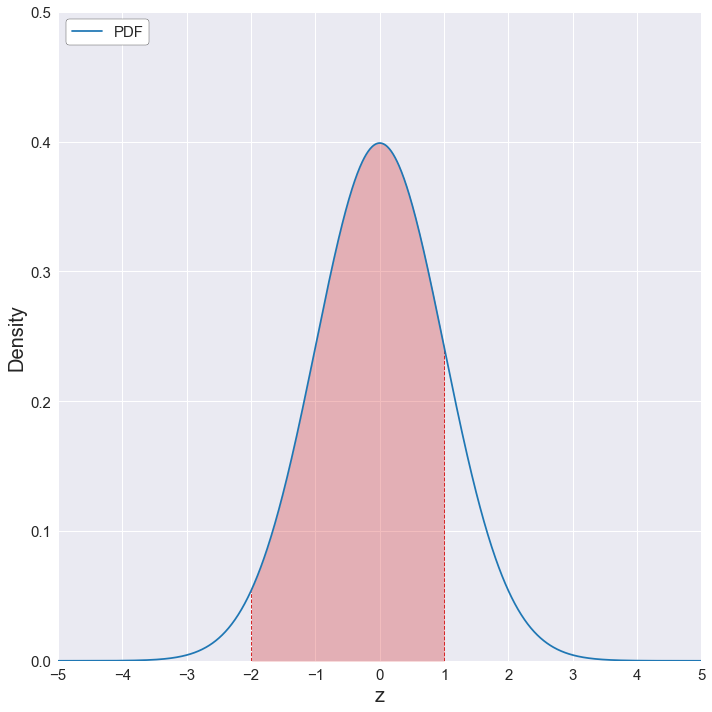

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
z = np.arange(-5, 5.01, 0.01)
a, b = -2, 1
z_ab = z[(z>=a) & (z<=b)]
ax.plot(z, pdf(z), label=r'PDF', color='tab:blue')
ax.vlines(a, 0, pdf(a), linestyles='--', lw=1, color='tab:red')
ax.vlines(b, 0, pdf(b), linestyles='--', lw=1, color='tab:red')
ax.fill_between(z_ab, 0, pdf(z_ab), color='tab:red', alpha=0.3)
ax.legend(**legend_opts, loc='upper left')
ax.set_xlim(-5, 5)
ax.set_ylim(-0, 0.5)
ax.set_yticks(np.arange(0, 0.51, 0.1))
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_xlabel('z')
ax.set_ylabel('Density')

plt.tight_layout()

plt.show()
fig.savefig('viz/normalprob.png')

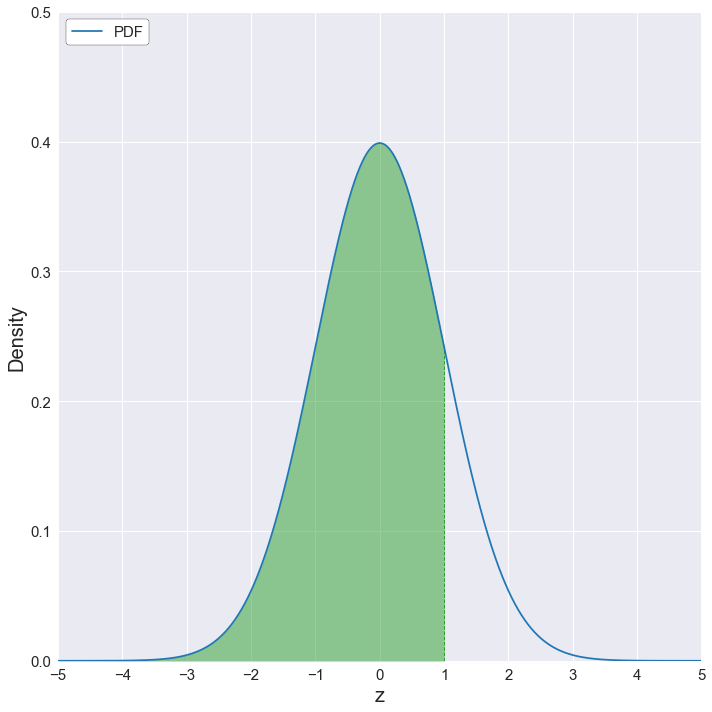

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
z = np.arange(-5, 5.01, 0.01)
z_left = z[z<1]
ax.plot(z, pdf(z), label=r'PDF', color='tab:blue')
ax.vlines(1, 0, 1/sqrt(2*pi)*exp(-1/2), linestyles='--', lw=1, color='tab:green')
ax.fill_between(z_left, 0, pdf(z_left), color='tab:green', alpha=0.5)
ax.set_xlabel('z')
ax.set_ylabel('Density')
ax.legend(**legend_opts, loc='upper left')
ax.set_xlim(-5, 5)
ax.set_ylim(-0, 0.5)
ax.set_yticks(np.arange(0, 0.51, 0.1))
ax.set_xticks(np.arange(-5, 6, 1))

plt.tight_layout()
plt.show()
fig.savefig('viz/normalarea.png')

## Sampling from position to area

In [16]:
rng = np.random.RandomState(seed=42)
samples = rng.standard_normal(size=1000)
cumprobs = cdf(samples)

In [17]:
def update(i, fig, cdf_ax, density_ax, cumprob_ax, verbose=False):
    if verbose and i%10==0:
        print(i)
    fig.suptitle(f'Sample {i+1}', fontsize=20)
    sample, cumprob = samples[i], cumprobs[i]
    rounded_sample, rounded_cumprob = np.floor(sample), np.floor(cumprob*10)/10
    
    density_counts.setdefault(rounded_sample, 0)
    density_ax.add_artist(Rectangle((rounded_sample, density_counts[rounded_sample]), 1, 1, facecolor='tab:blue'))
    density_counts[rounded_sample] += 1
    
    cumprob_counts.setdefault(rounded_cumprob, 0)
    cumprob_ax.add_artist(Rectangle((cumprob_counts[rounded_cumprob], rounded_cumprob), 1, 0.1, facecolor='tab:green'))
    cumprob_counts[rounded_cumprob] += 1
    
    cdf_ax.scatter(sample, 1, color='tab:blue', clip_on=False, zorder=11)
    cdf_ax.scatter(4, cumprob, color='tab:green', clip_on=False, zorder=12)
    cdf_ax.hlines(cumprob, sample, 4, color='tab:green', linestyles=':', linewidth=1, alpha=0.5)
    cdf_ax.vlines(sample, cumprob, 1, color='tab:blue', linestyles=':', linewidth=1, alpha=0.5)

0
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
0


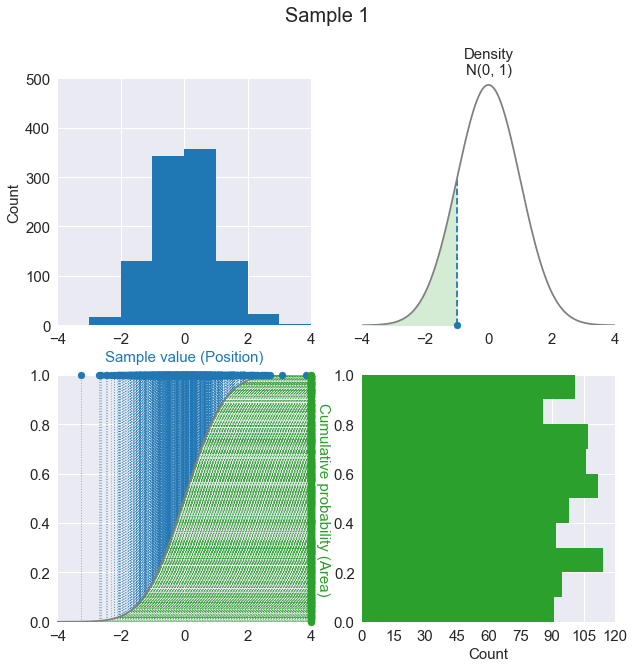

In [19]:
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(2, 2)
z = np.arange(-4, 4.01, 0.01)
z_left = z[z<-1]

cdf_ax = fig.add_subplot(grid[1, 0])
cdf_ax.plot(z, cdf(z), color='tab:gray')
cdf_ax.set_xlim(-4, 4)
cdf_ax.set_ylim(0, 1)

pdf_ax = fig.add_subplot(grid[0, 1], frameon=True)
pdf_ax.patch.set_edgecolor('black') 
pdf_ax.plot(z, pdf(z), color='tab:gray')
pdf_ax.scatter(-1, 0, color='tab:blue', clip_on=False)
pdf_ax.vlines(-1, 0, pdf(-1), linestyles='--', color='tab:blue')
pdf_ax.fill_between(z_left, 0, pdf(z_left), color='tab:green', alpha=0.2)
pdf_ax.set_xlim(-4, 4)
pdf_ax.set_ylim(0, 0.41)
pdf_ax.set_facecolor('white')
pdf_ax.set_yticks([])
pdf_ax.set_xlabel('Density\nN(0, 1)', fontsize=15)
pdf_ax.xaxis.set_label_position('top') 

density_ax = fig.add_subplot(grid[0, 0], sharex=cdf_ax)
density_ax.set_ylim(0, 500)
density_ax.set_xlabel('Sample value (Position)', fontsize=15, color='tab:blue')
density_ax.set_ylabel('Count', fontsize=15)

cumprob_ax = fig.add_subplot(grid[1, 1], sharey=cdf_ax)
cumprob_ax.set_xlim(0, 120)
cumprob_ax.set_xticks(np.arange(0, 121, 15))
cumprob_ax.set_xlabel('Count', fontsize=15)
cumprob_ax.set_ylabel('Cumulative probability (Area)', fontsize=15, rotation=270, va='top', color='tab:green')

density_counts = {}
cumprob_counts = {}
anim = FuncAnimation(fig, lambda i: update(i, fig, cdf_ax, density_ax, cumprob_ax, verbose=True), 
                     frames=range(len(samples)), interval=50, repeat=True)
anim.save('viz/cdf.mp4', writer='ffmpeg')

## Erf(x)

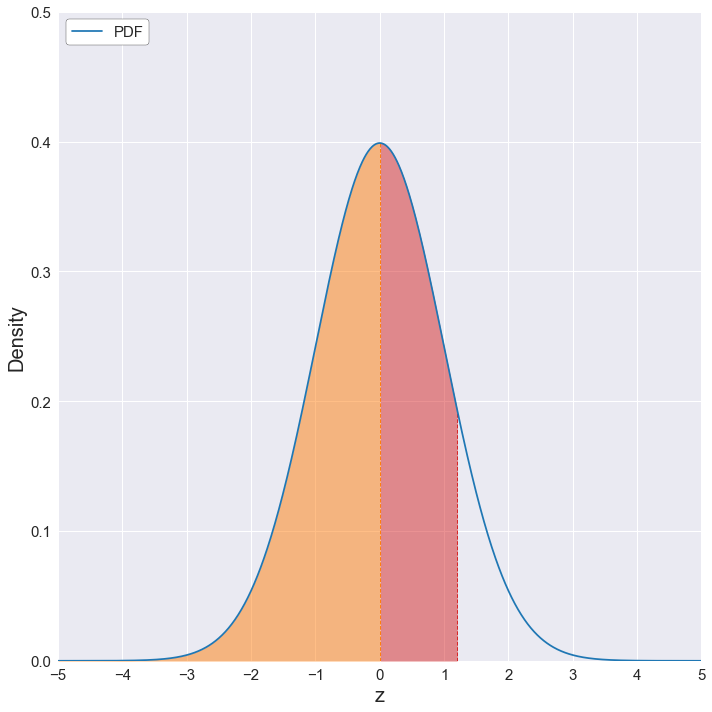

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
z = np.arange(-5, 5.01, 0.01)
z_left0 = z[z<0]
x = 1.2
z_0x = z[(z>0) & (z<x)]
ax.plot(z, pdf(z), label=r'PDF', color='tab:blue')
ax.vlines(0, 0, 1/sqrt(2*pi), linestyles='--', lw=1, color='tab:orange')
ax.fill_between(z_left0, 0, pdf(z_left0), color='tab:orange', alpha=0.5)
ax.vlines(x, 0, 1/sqrt(2*pi)*exp(-x**2/2), linestyles='--', lw=1, color='tab:red')
ax.fill_between(z_0x, 0, pdf(z_0x), color='tab:red', alpha=0.5)
ax.set_xlabel('z')
ax.set_ylabel('Density')
ax.legend(**legend_opts, loc='upper left')
ax.set_xlim(-5, 5)
ax.set_ylim(-0, 0.5)
ax.set_yticks(np.arange(0, 0.51, 0.1))
ax.set_xticks(np.arange(-5, 6, 1))

plt.tight_layout()
plt.show()
fig.savefig('viz/cdfarea.png')

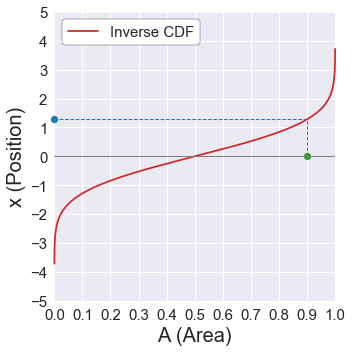

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 1)
ax.set_ylim(-5, 5)
areas = np.arange(0.0001, 1, 0.0001)
xs = sqrt(2) * erfinv(2*areas-1)
ax.set_xticks(np.arange(0, 1.01, 0.1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xlabel('A (Area)')
ax.set_ylabel('x (Position)')
ax.plot(areas, xs, color='tab:red', label='Inverse CDF', clip_on=False)
ax.scatter(0.9, 0, color='tab:green')
ax.scatter(0, invcdf(0.9), color='tab:blue', clip_on=False)
ax.vlines(0.9, 0, invcdf(0.9), linestyles='--', linewidth=1, color='tab:green')
ax.hlines(invcdf(0.9), 0, 0.9, linestyles='--', linewidth=1, color='tab:blue')
ax.axhline(0, lw=1, color='tab:gray')
ax.legend(**legend_opts, loc='upper left')

plt.tight_layout()
plt.savefig('viz/inverseCDF.png')

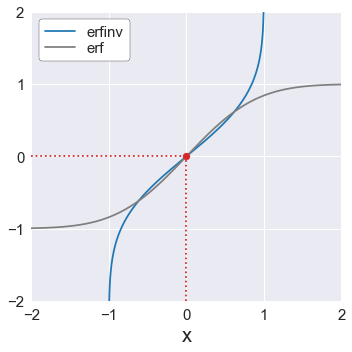

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0-1, 1)
ax.set_ylim(-2, 2)
bs = np.arange(-0.9999, 1, 0.0001)
xs = erfinv(bs)

cs = np.arange(-2, 2, 0.0001)
es = erf(cs)
ax.set_xticks(np.arange(-2, 3, 1))
ax.set_xlabel('x')
ax.set_yticks(np.arange(-2, 3, 1))
ax.plot(bs, xs, color='tab:blue', label='erfinv')
ax.plot(cs, es, color='tab:gray', label='erf')

ax.hlines(0, -2, 0, linestyles=':', color='tab:red')
ax.vlines(0, -2, 0, linestyles=':', color='tab:red')
ax.scatter(0, 0, color='tab:red', zorder=10)
ax.legend(**legend_opts, loc='upper left')

plt.tight_layout()
plt.savefig('viz/erfinv.png')

## Erfinv(x)

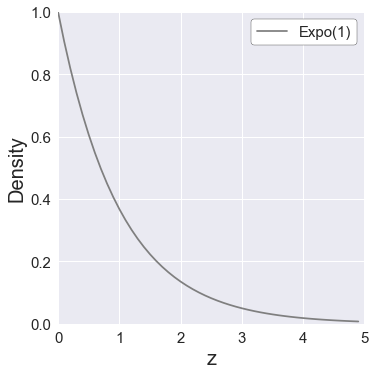

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))
z = np.arange(0, 5, 0.1)
ax.plot(z, np.exp(-z), color='tab:gray', label='Expo(1)')
ax.legend(**legend_opts)
ax.set_xlim(0, 5)
ax.set_ylim(0, 1)
plt.tight_layout()
ax.set_xlabel('z')
ax.set_ylabel('Density')

fig.savefig('viz/expo1.png', bbox_inches='tight')

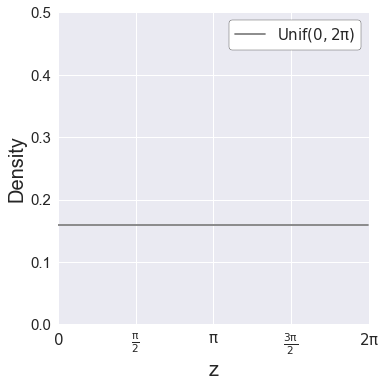

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
z = np.arange(0, 2*pi, 0.01)
ax.plot(z, [1/(pi*2)]*len(z), color='tab:gray', label='$\mathrm{Unif(0, 2\pi)}$')
ax.legend(**legend_opts)
ax.set_xlim(0, 2*pi)
ax.set_ylim(0, 0.5)
plt.tight_layout()
ax.set_xlabel('z')
ax.set_ylabel('Density')
ax.set_xticks([0, pi/2, pi, 3*pi/2, 2*pi])
ax.set_xticklabels([r'$\mathrm{0}$', r'$\mathrm{\frac{\pi}{2}}$', r'$\mathrm{\pi}$', r'$\mathrm{\frac{3\pi}{2}}$', r'$\mathrm{2\pi}$'])

fig.savefig('viz/uni2pi.png', bbox_inches='tight')

In [132]:
def update_P(P, n):
    EP = [0] + P
    two_nEP = [2 * n * coeff for coeff in EP]
    dP = [power * coeff for power, coeff in enumerate(P)][1:]
    updated_P = [two_nEP_coeff + dP_coeff for two_nEP_coeff, dP_coeff in zip_longest(two_nEP, dP, fillvalue=0)]
    return updated_P

In [186]:
taylor_coeffs = [0, sqrt(pi)/2]   # First two coefficients
P = [0, 2]                        # Polynomial of second derivative
dE = sqrt(pi)/2                   # First derivative at x = 0
### Find Taylor coefficient for each term from x^2 to x^50
for n in range(2, 51):
    P_const = P[0]                # Constant term of polynomial
    taylor_coeff = (dE**n * P_const) / factorial(n)
    P = update_P(P, n)
    taylor_coeffs.append(taylor_coeff)

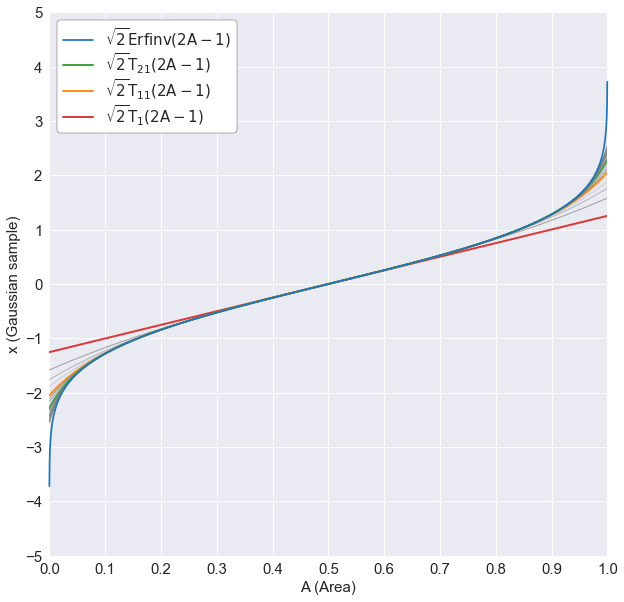

In [188]:
fig, ax = plt.subplots(figsize=(10, 10))
a = np.arange(0, 1.0001, 0.0001)
b = 2*a - 1
x = np.zeros(len(a))
color_dict = {1: 'tab:red', 11:'tab:orange', 21:'tab:green'}
label_dict = {1: '$\mathrm{\sqrt{2}{T_1(2A-1)}}$', 11: '$\mathrm{\sqrt{2}T_{11}(2A-1)}$', 21: '$\mathrm{\sqrt{2}T_{21}(2A-1)}$'}
lw_dict = {1: 2, 11: 2, 21: 2}

for power, coeff in enumerate(taylor_coeffs):
    x += sqrt(2) * (coeff * b**power)
    if power%2 != 0:
        ax.plot(a, x, color=color_dict.get(power, 'tab:gray'), lw=lw_dict.get(power, 1), alpha=(1-0.1*power), label=label_dict.get(power, '_nolegend_'))
ax.plot(a, sqrt(2) * erfinv(b), color='tab:blue', label='$\mathrm{\sqrt{2}Erfinv(2A-1)}$', clip_on=False)

ax.set_xlim(0, 1)
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(-5, 5)
ax.set_yticks(range(-5, 6))
ax.set_xlabel('A (Area)', fontsize=15)
ax.set_ylabel('x (Gaussian sample)', fontsize=15)

ax.legend(**legend_opts, loc='upper left')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], **legend_opts, loc='upper left')


fig.savefig('viz/erfinv.png')

In [8]:
a = 0.9
invcdf21 = InverseCDF(power=21)
invcdf11 = InverseCDF(power=11)
invcdf1 = InverseCDF(power=1)
invcdf1.calculate_sample(a), invcdf11.calculate_sample(a), invcdf21.calculate_sample(a), sqrt(2) * erfinv(2*a-1)

(1.0026513098524001,
 1.2740421698775237,
 1.2810928879786332,
 1.2815515655446004)

In [10]:
unif_xs = np.random.RandomState(seed=42).uniform(size=1000)
unif_ys = np.random.RandomState(seed=24).uniform(size=1000)
invcdf21 = InverseCDF(power=21)
gaussian_xs = invcdf21.calculate_sample(unif_xs)
gaussian_ys = invcdf21.calculate_sample(unif_ys)

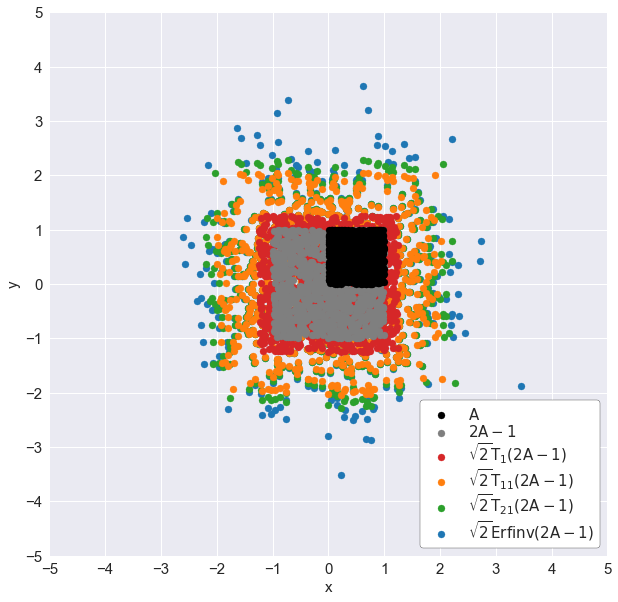

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(unif_xs, unif_ys, color='black', zorder=16, label='$\mathrm{A}$')
ax.scatter(2*unif_xs-1, 2*unif_ys-1, color='tab:gray', zorder=15, label='$\mathrm{2A-1}$')
ax.scatter(invcdf1.calculate_sample(unif_xs), invcdf1.calculate_sample(unif_ys), color='tab:red', zorder=14, label='$\mathrm{\sqrt{2}T_{1}(2A-1)}$')
ax.scatter(invcdf11.calculate_sample(unif_xs), invcdf11.calculate_sample(unif_ys), color='tab:orange', zorder=13, label='$\mathrm{\sqrt{2}T_{11}(2A-1)}$')
ax.scatter(invcdf21.calculate_sample(unif_xs), invcdf21.calculate_sample(unif_ys), color='tab:green', zorder=12, label='$\mathrm{\sqrt{2}T_{21}(2A-1)}$')
ax.scatter(sqrt(2)*erfinv(2*unif_xs-1), sqrt(2)*erfinv(2*unif_ys-1), color='tab:blue', zorder=11, label='$\mathrm{\sqrt{2}Erfinv(2A-1)}$')

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xticks(range(-5, 6))
ax.set_yticks(range(-5, 6))
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.legend(**legend_opts)

fig.savefig('viz/erfinv_samples.png', bbox_inches='tight')